In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# cargar el CSV 
df = pd.read_csv("heart.csv")

# codificar variables categóricas con pd.get_dummies
df_encoded = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)

# X = características, Y = target
X = df_encoded.drop("HeartDisease", axis=1) 
y = df_encoded["HeartDisease"]

#dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#normalizar solo los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
#Modelo de regresión logística binario
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
#predicción
y_pred = log_reg.predict(X_test_scaled)

#evaluación
accuracy_log_reg = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo Regresión Logarítmica: {accuracy_log_reg:.2f}")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


Precisión del modelo Regresión Logarítmica: 0.85
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

[[67 10]
 [17 90]]


In [45]:
#Modelo Random Forest

#entrenar un clasificador con valores no escalados
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
#predicción
y_pred = rf.predict(X_test)

#calcular precisión
accuracy_rf = accuracy_score(y_test,y_pred)
print(f"Precisión del modelo Random Forest: {accuracy_rf:.2f}")
print("Reporte de clasificación:\n",classification_report(y_test,y_pred))

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

Precisión del modelo Random Forest: 0.88
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

[[66 11]
 [12 95]]


In [47]:
#Modelo SVM
svm_model = svm.SVC(probability=True,random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [48]:
#realizar predicciones sobre el conjunto de prueba
y_pred_svm = svm_model.predict(X_test_scaled)

#calcular la precisión de svm
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Precisión del modelo SVM: {accuracy_svm:.2f}")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_svm))

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_svm)

print(conf_matrix)

Precisión del modelo SVM: 0.88
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

[[67 10]
 [13 94]]


In [49]:
#comparaciones generales

#calcular f1_score por cada modelo
f1_log_reg = f1_score(y_test, log_reg.predict(X_test_scaled))
f1_rf = f1_score(y_test, rf.predict(X_test))
f1_svm = f1_score(y_test, svm_model.predict(X_test_scaled))

#calcular recall por caada modelo
recall_log_reg = recall_score(y_test, log_reg.predict(X_test_scaled))
recall_rf = recall_score(y_test, rf.predict(X_test))
recall_svm = recall_score(y_test, svm_model.predict(X_test_scaled))

datos = {
    'Precisión': [accuracy_log_reg, accuracy_rf, accuracy_svm],
    'F1-score': [f1_log_reg, f1_rf, f1_svm],
    'Recall': [recall_log_reg, recall_rf, recall_svm]
}
modelos = ['Regresión Logística', 'Random Forest', 'SVM']

#graficar
print("Gráfico de comparaciones:")
df_resultados = pd.DataFrame(datos, index=modelos)
print(df_resultados.round(2))

Gráfico de comparaciones:
                     Precisión  F1-score  Recall
Regresión Logística       0.85      0.87    0.84
Random Forest             0.88      0.89    0.89
SVM                       0.88      0.89    0.88


---------------------------------------------

AUC Regresión Logística: 0.927
AUC Random Forest: 0.936
AUC SVM: 0.942


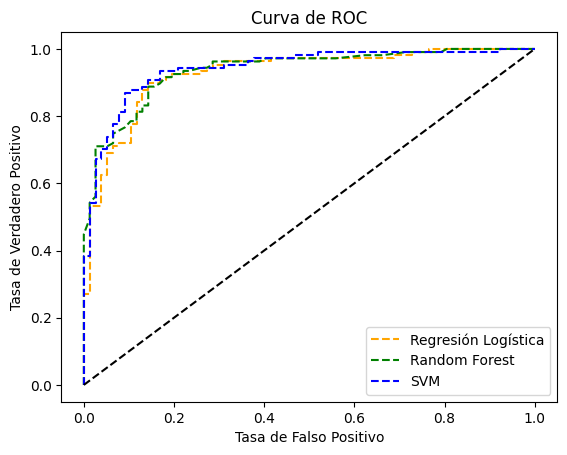

In [50]:
#Predicción de probabilidades
pred_prob1 = log_reg.predict_proba(X_test_scaled)
pred_prob2 = rf.predict_proba(X_test)
pred_prob3 = svm_model.predict_proba(X_test_scaled)

#Curva de ROC para los modelos
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

#Curva de ROC para tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#AUC scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print("---------------------------------------------\n")

print(f"AUC Regresión Logística: {auc_score1:.3f}")
print(f"AUC Random Forest: {auc_score2:.3f}")
print(f"AUC SVM: {auc_score3:.3f}")


#Graficar la curva
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Regresión Logística')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('Curva de ROC')
# x label
plt.xlabel('Tasa de Falso Positivo')
# y label
plt.ylabel('Tasa de Verdadero Positivo')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();